In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
powerlift = pd.read_csv('powerlift.csv', index_col = 'Unnamed: 0')
powerlift['WILKS Level'] = powerlift['WILKS Level'].replace('Very Hight WILKS', 'Very High WILKS').replace('Hight WILKS', 'High WILKS')
powerlift.head()


,MeetID,Name,Sex,Equipment,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Wilks,Federation,Squat Weight,Bench Weight,Deadlift Weight,Total Weight,WILKS Level,Cluster Name
0,0,Angie Belk Terry,F,Wraps,59.60,60,47.63,20.41,70.31,138.35,155.05,Not IPF,Light Squat,Very Light Bench,Very Light DL,Very Light Total,Very Low WILKS,Heavy and Weak
1,0,Dawn Bogart,F,Single-ply,58.51,60,142.88,95.25,163.29,401.42,456.38,Not IPF,Moderate Squat,Moderate Bench,Moderate DL,Moderate Total,Very High WILKS,Average and Average
2,0,Dawn Bogart,F,Raw,58.51,60,0.00,95.25,0.00,95.25,108.29,Not IPF,Very Light Squat,Moderate Bench,Very Light DL,Very Light Total,Very Low WILKS,Heavy and Weak
3,0,Destiny Dula,F,Raw,63.68,67.5,0.00,31.75,90.72,122.47,130.47,Not IPF,Very Light Squat,Very Light Bench,Very Light DL,Very Light Total,Very Low WILKS,Heavy and Weak
4,0,Courtney Norris,F,Wraps,62.41,67.5,170.10,77.11,145.15,392.36,424.40,Not IPF,Moderate Squat,Light Bench,Light DL,Moderate Total,Very High WILKS,Average and Strong


[Text(0, 0, 'Very Low WILKS'),
 Text(0, 0, 'Low WILKS'),
 Text(0, 0, 'Moderate WILKS'),
 Text(0, 0, 'High WILKS'),
 Text(0, 0, 'Very High WILKS')]

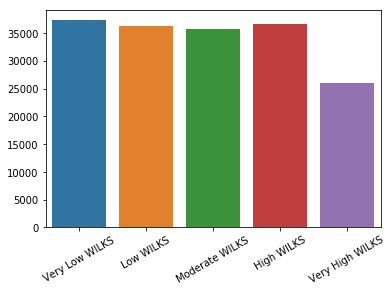

In [3]:
equip_raw = powerlift['Equipment'] == 'Raw'
powerlift_raw = powerlift[equip_raw]

raw_group = powerlift_raw['WILKS Level'].value_counts()
raw_group = raw_group.reindex(['Very Low WILKS', 'Low WILKS', 'Moderate WILKS', 'High WILKS', 'Very High WILKS'])
ax = sns.barplot(raw_group.index, raw_group.values)

ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)

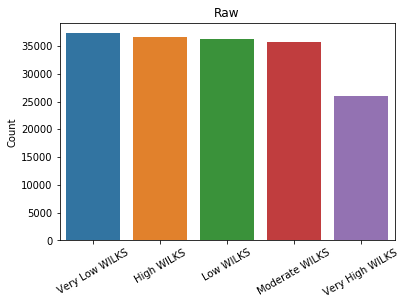

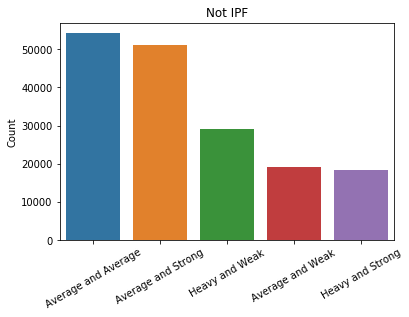

In [4]:
# The function creates a simple bar chart based on filtering and aggregating our data. 
# We filter the data by defining a column name and choosing a value in that column. 
# We aggregate our data with choosing the column as group. 
# This is useful for exploring the data at a high level.
# Looking at one categorical variable at a time.
# The only downside to this is that we are not able to decide which order the columns are created.
def barchart(column, value_type, group):
    col_value = powerlift[column] == value_type
    powerlift_value = powerlift[col_value]
    count_group = powerlift_raw[group].value_counts()
    ax = sns.barplot(count_group.index, count_group.values)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
    ax.set(ylabel='Count')
    ax.set_title(value_type)
    plt.show()
    
barchart( 'Equipment', 'Raw', 'WILKS Level')
barchart( 'Federation', 'Not IPF', 'Cluster Name')


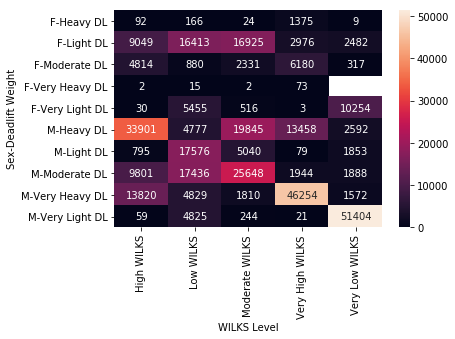

In [5]:
# The last column is arbitary, if it is not called, then we will have the same value given too many times ( one
# for every other column in the dataframe)
def pivot_count(df, rows, columns, calc_field):
    df_pivot = df.pivot_table(values=calc_field, 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    return df_pivot
    
    

map1 = pivot_count(powerlift, ['Sex', 'Deadlift Weight'], 'WILKS Level', 'Federation')

sns.heatmap(map1, annot = True, fmt = 'g')

plt.show()


A common thing to do is gather information based on time. This data is unclear about meet number, which means that a meet number doesn't necessarily have to be reported in order. So a wiser decision is to opt out of a time analysis

C:\Users\alber\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


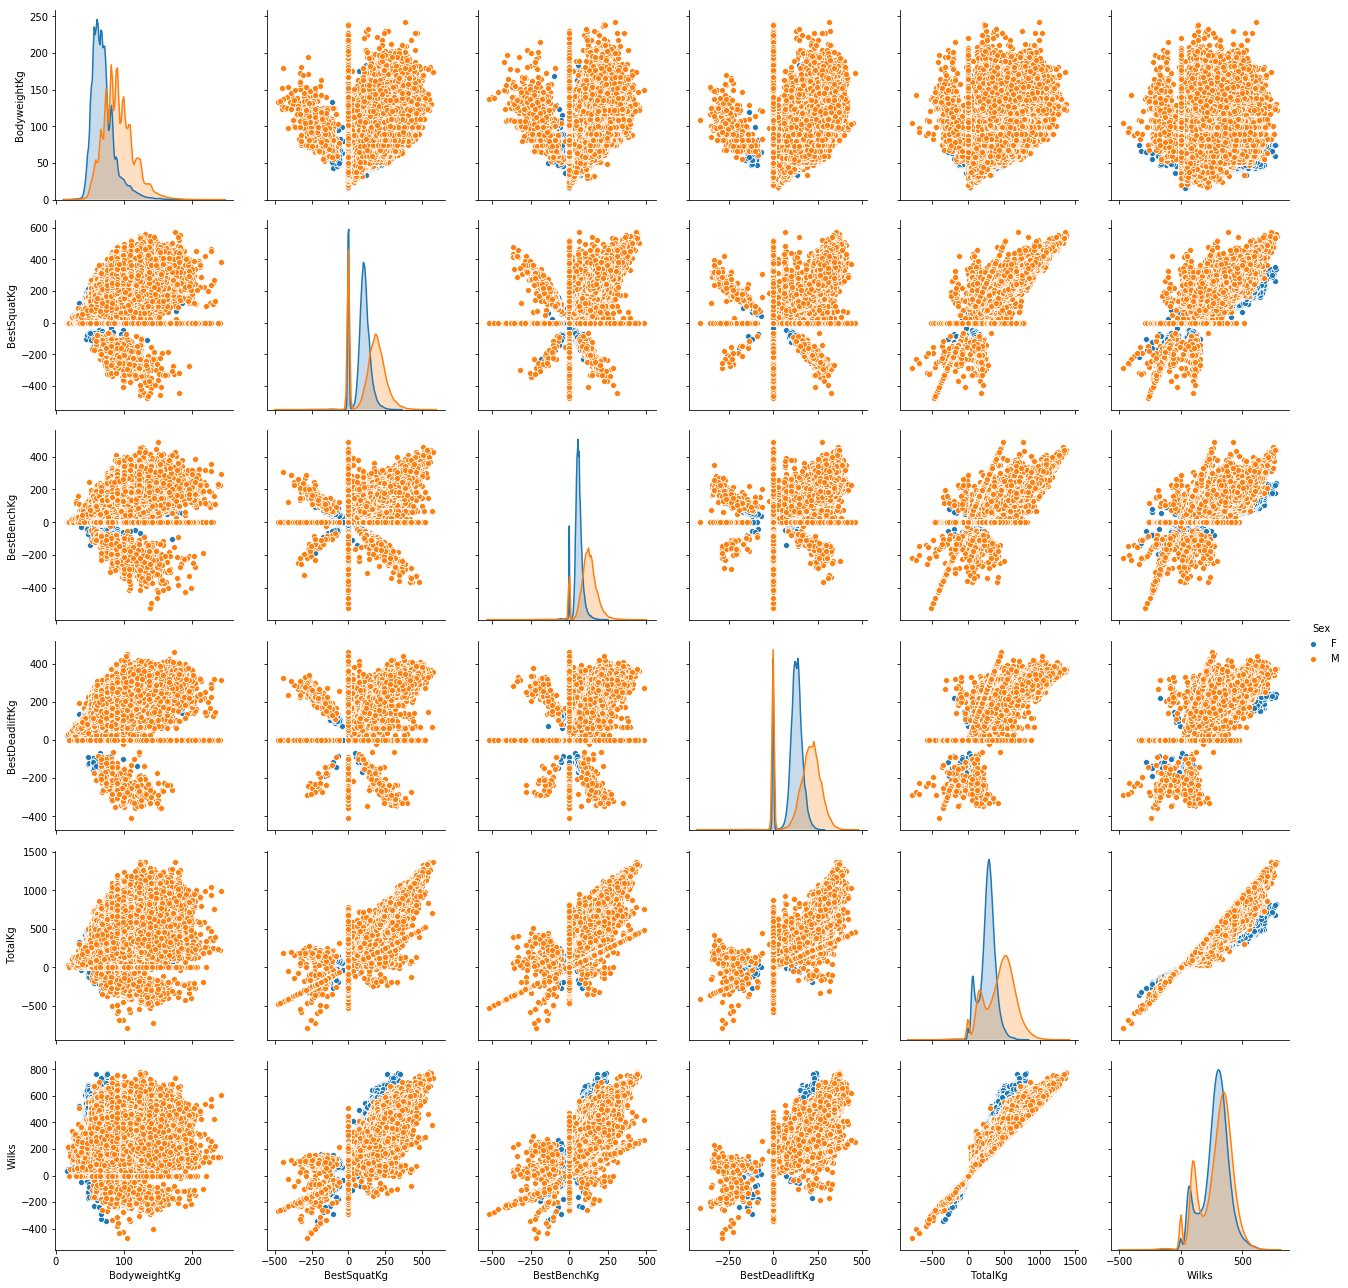

In [7]:
select_columns = ['BodyweightKg', 'BestSquatKg', 'BestBenchKg', 'BestDeadliftKg', 'TotalKg', 'Wilks']
sns.pairplot(powerlift, height = 3, vars = select_columns, hue = 'Sex')
plt.show()

The beauty of this frame work is the simplicity and that it is reproducible for other data sets. 

In the next part I will create a module that will contain all the functions and used here.